In [7]:
library('tidyverse')
library('readxl')

In [8]:
survivor = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2021/2021-06-01/summary.csv')

survivor |> glimpse()

Rows: 40 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): season_name, location, country, tribe_setup, full_name, winner, ru...
dbl  (6): season, viewers_premier, viewers_finale, viewers_reunion, viewers_...
date (4): premiered, ended, filming_started, filming_ended

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 40
Columns: 19
$ season_name     <chr> "Survivor: Borneo", "Survivor: The Australian Outback"…
$ season          <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,…
$ location        <chr> "Pulau Tiga, Sabah, Malaysia", "Herbert River at Goshe…
$ country         <chr> "Malaysia", "Australia", "Kenya", "Polynesia", "Thaila…
$ tribe_setup     <chr> "Two tribes of eight new players", "Two tribes of eigh…
$ full_name       <chr> "Richard Hatch", "Tina Wesson", "Ethan Zohn", "Vecepia…
$ winner          <chr> "Richard", "Tina", "Ethan", "Vecepia", "Brian", "Jenna…
$ runner_ups      <chr> "Kelly Wiglesworth", "Colby Donaldson", "Kim Johnson",…
$ final_vote      <chr> "4-3", "4-3", "5-2", "4-3", "4-3", "6-1", "6-1", "4-3"…
$ timeslot        <chr> "Wednesday 8:00 pm", "Thursday 8:00 pm", "Thursday 8:0…
$ premiered       <date> 2000-05-31, 2001-01-28, 2001-10-11, 2002-02-28, 2002-…
$ ended           <date> 2000-08-23, 2001-05-03, 2002-01-10, 2002-05-19, 2002-…
$ filming_started <

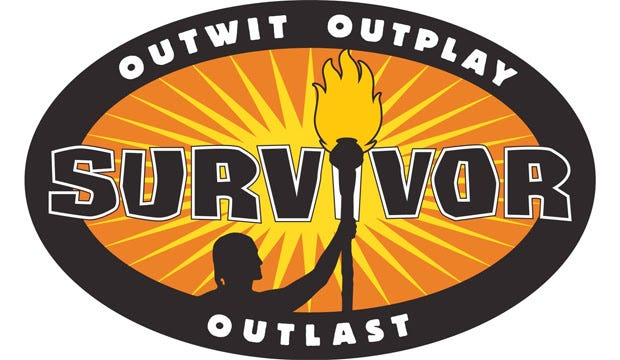

**Survivor** is a popular reality television show hosted by Emmy Award winning host, Jeff Probst, where a group of strangers compete against each other on a remote island for a million dollars 💸. 

The castaways compete in a series of group and individual challenges for various prizes to increase their chances of *surviving* on the island. Prizes range from food 🍔, to clues 🤔, to a brief visit from a loved one 👩‍👧as the game progresses and becomes more challenging. 

A player's gameplay is essential to winning as they must balance winning challenges,  survival savviness, and popularity, since players are eliminated by being voted off by their peers at a Tribal Council every few days. The amusing twist in the show is that the winner must be voted as winner by the same players they helped to eliminate. 😏

In [11]:
season_count = survivor |> 
summarize(total_seasons = n_distinct(season))

print(season_count)

# A tibble: 1 × 1
  total_seasons
          <int>
1            40


Survivor has a strong 47 season run, with 40 seasons included in this dataset.
Of the 40 seasons included, **the top 5 viewer ranked seasons** are listed in the table below with their premier date.

In [12]:
top5 = survivor |> 
filter(rank %in% c("1", "2", "3", "4", "5")) |>
group_by(season_name) |>
select(rank, season_name, season, premiered) |>
arrange(rank) 

top5

rank,season_name,season,premiered
<dbl>,<chr>,<dbl>,<date>
1,Survivor: The Australian Outback,2,2001-01-28
2,Survivor: Borneo,1,2000-05-31
3,Survivor: All-Stars,8,2004-02-01
4,Survivor: Thailand,5,2002-09-19
5,Survivor: Palau,10,2005-02-17


**Live viewership has decreased overtime** for the premier, finale, and reunion episodes. This may be **attributed to a decline in viewership, and/or the shift to on-demand streaming during the past two decades in place of live cable tv**. The reunion is the least watched episode, and the premier is viewed on average slightly more than the finale across seasons. 

In [13]:
survivor_pivot = survivor |>
    pivot_longer(
    cols = c('viewers_premier', 'viewers_finale', 'viewers_reunion'),
    names_to='Episode',
    values_to='viewers') 


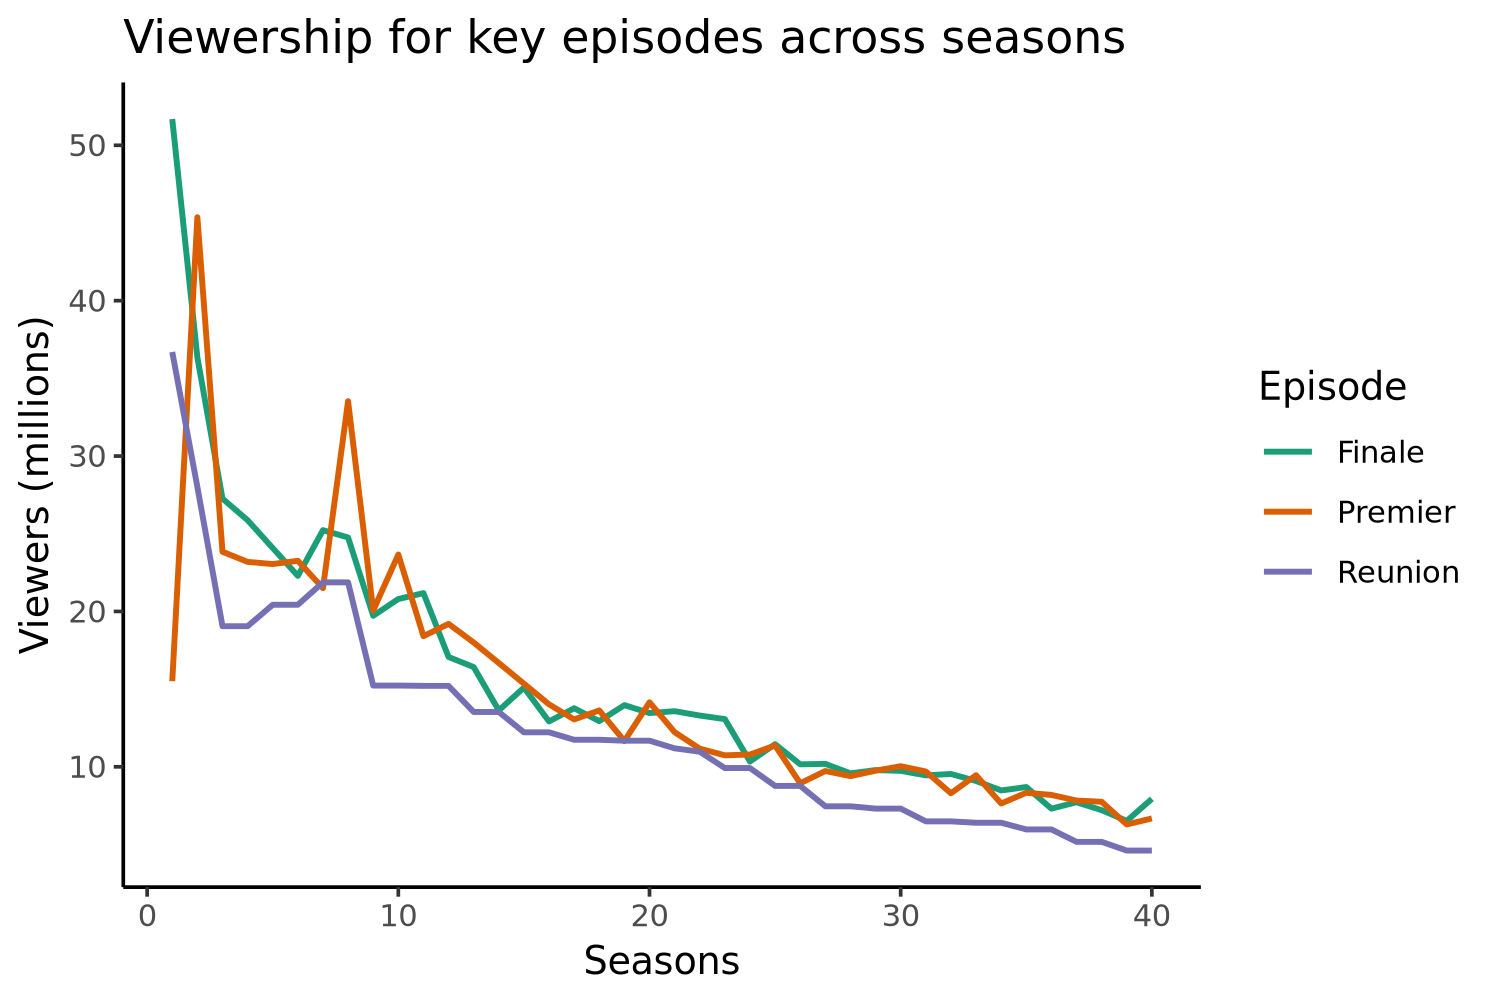

In [14]:
#viewers_premier, viewers_finale, viewers_reunion - in millions 

ggplot(survivor_pivot, aes(x = season, y = viewers, color = Episode)) + 
geom_line(linewidth = 0.8) +
   labs(x = "Seasons", y = "Viewers (millions)") + 
     ggtitle("Viewership for key episodes across seasons") + 
    theme(
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black")
         ) +
 scale_color_manual(labels = c("Finale", "Premier", "Reunion"), values = c("#1B9E77", "#D95F02", "#7570B3"))



The show takes viewers around the world filming on a variety of islands to differentiate the terrain. The **bar chart** below shows the most used islands and categorizes islands used only once as "other." Mamanuca Islands island in **Fiji** was the most popular island used 8 times. 🏝️

In [17]:
#get country function stringr in tidyverse, -1 means take the last
#defined function, then tested it 
#location doesnt need to be the variable (can use x), any encoding for the label wil be passed through 

get_country = function (location) {
    country = str_split_i(location, ',', -1)
    #short_island = str_split_i(location, ',', 1)
    return(country)
    }
#check that this works 
get_country("Mamanuca Islands, Fiji")

[1] " Fiji"

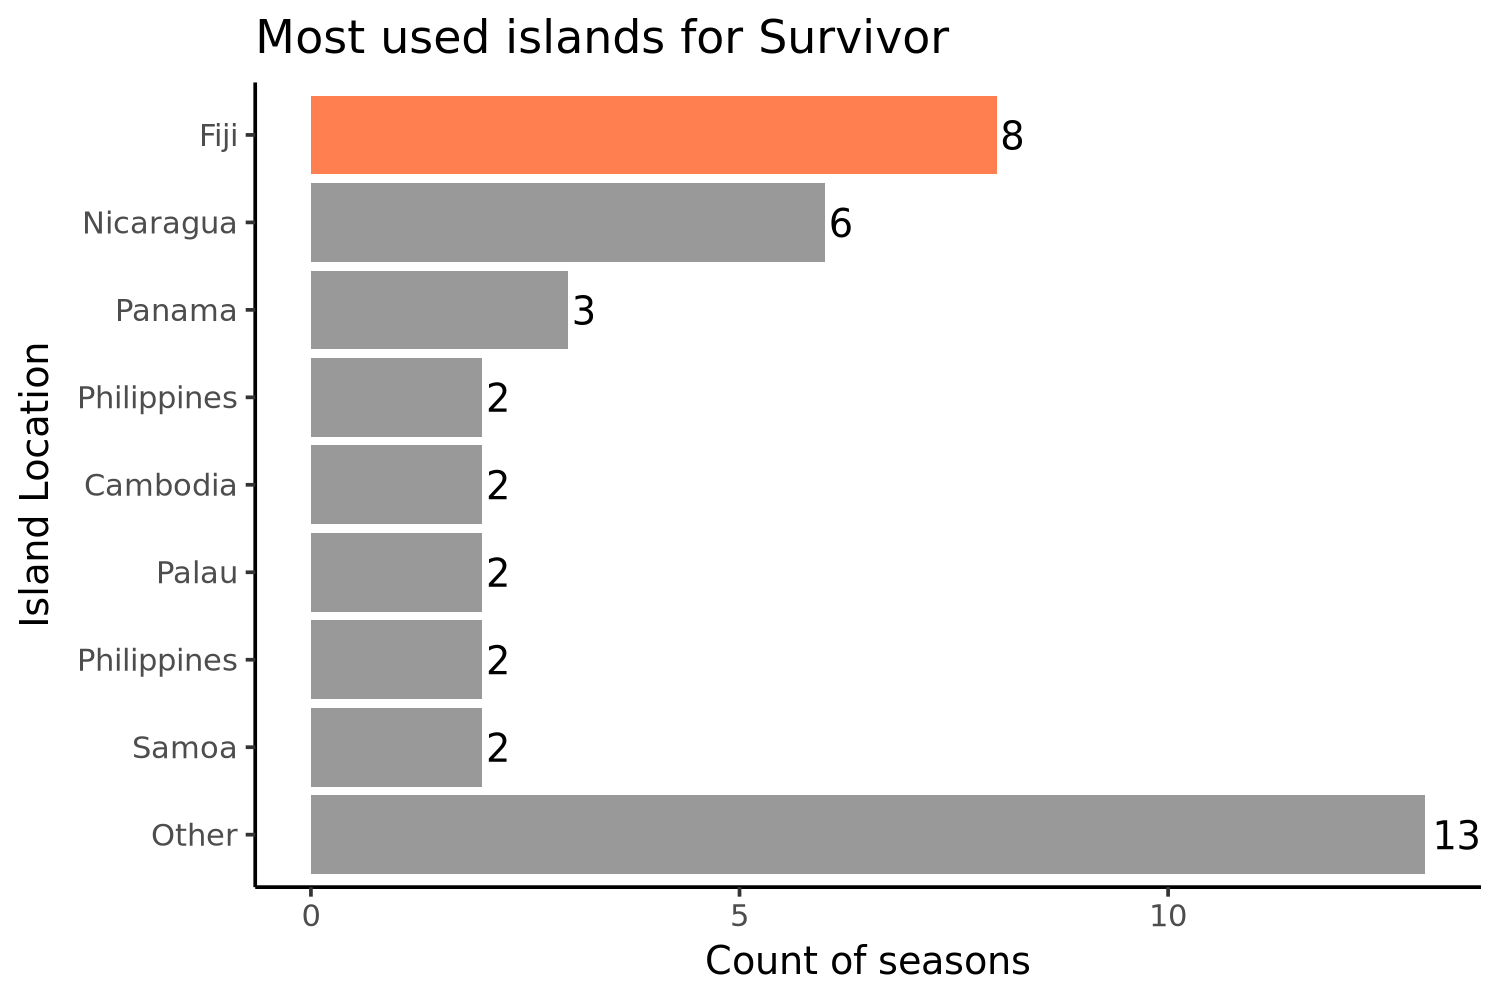

In [16]:
options(repr.plot.res = 250, repr.plot.height = 4, repr.plot.width = 6)

locations = survivor |>
   mutate(location = fct_infreq(location)) |> 
    mutate(location = fct_lump(location, n=8) |>
          fct_relevel('Other', after= Inf) |>
            fct_rev() ) |>
    mutate(is_Fiji = location == 'Mamanuca Islands, Fiji') |>

ggplot(aes(y = location, fill=is_Fiji)) + 
    geom_bar() +
    scale_fill_manual(values = c('grey60', 'coral')) +
    scale_y_discrete(labels = get_country) +
    guides(fill = 'none') + 
    geom_text(stat = "count", aes(label = after_stat(count)), hjust = -0.15) +
    labs(x = "Count of seasons", y = "Island Location") + 
     ggtitle("Most used islands for Survivor ") + 
       #ggtitle("Most used islands\nfor Survivor ")
    theme(
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"))

locations